In [22]:
# import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [23]:
# import the dataset
breast_cancer = pd.read_csv('./breast_cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
# information of the dataset
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

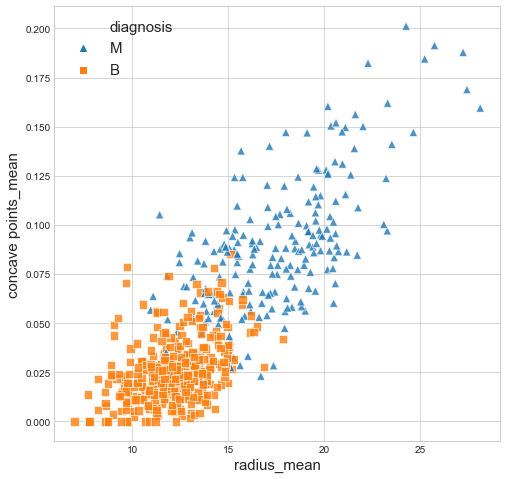

In [25]:
# plot breast cancer dataset in 2D
plt.figure(figsize = [8, 8])
sns.scatterplot(x = 'radius_mean',
                y = 'concave points_mean',
                data = breast_cancer,
                hue = 'diagnosis',
                style = 'diagnosis',
                markers = ["^", "s"],
                alpha = 0.8,
                s = 70)
plt.xlabel('radius_mean', size = 15)
plt.ylabel('concave points_mean', size = 15)
plt.legend(loc = 'upper left',
           fontsize = 15)

plt.show()

In [26]:
# Create feature and target arrays
X = breast_cancer[['concave points_mean', 'radius_mean']]
y = breast_cancer[['diagnosis']]
data = [X, y]
data[0].head()

,concave points_mean,radius_mean
0,0.14710,17.99
1,0.07017,20.57
2,0.12790,19.69
3,0.10520,11.42
4,0.10430,20.29


Decision Tree

In [27]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state = 1)

In [28]:
# fit dt to the training set
dt.fit(X_train, y_train)

# predict test set labels
y_pred_dt = dt.predict(X_test)

# evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy (Decision Tree): {:.3f}'.format(acc))

Test set accuracy (Decision Tree): 0.904


Logistic Regression

In [29]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# predict test set labels
y_pred_logreg = logreg.predict(X_test)

# evaluate test-set accuracy
acc = accuracy_score(y_test, y_pred_logreg)
print('Test set accuracy (Logistic Regression): {:.3f}'.format(acc))

Test set accuracy (Logistic Regression): 0.886


Decision Tree (criterion : gini index, entropy)

In [30]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state = 1)

In [31]:
# fit dt to the training set
dt_gini.fit(X_train, y_train)

# predict test set labels
y_pred_dt_gini = dt_gini.predict(X_test)

# evaluate accuracy_gini
accuracy_gini = accuracy_score(y_test, y_pred_dt_gini)

In [32]:
# classification-tree in scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splot dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 1)

# instantiate dt
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 1)

In [33]:
# fit dt to the training set
dt_entropy.fit(X_train, y_train)

# predict test set labels
y_pred_dt_entropy = dt_entropy.predict(X_test)

# evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred_dt_entropy)

In [34]:
# print accuracy_entropy
print('Accuracy achieved by using entropy: {:.3f}'.format(accuracy_entropy))

# print accuracy_gini
print('Accuracy achieved by using the gini index: {:.3f}'.format(accuracy_gini))

Accuracy achieved by using entropy: 0.895
Accuracy achieved by using the gini index: 0.886
